In [4]:
from animl.trees import *
from animl.viz.trees import *
from sklearn.datasets import load_boston

boston = load_boston()

X_train = boston.data
y_train = boston.target
testX = X_train[5,:]

regr = tree.DecisionTreeRegressor(max_depth=3)
regr = regr.fit(X_train, y_train)

viz = dtreeviz(regr, X_train, y_train, target_name='price',
               feature_names=boston.feature_names,
               X = testX)
viz

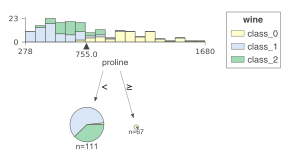

In [5]:
from animl.trees import *
from animl.viz.trees import *
from sklearn.datasets import load_wine

clf = tree.DecisionTreeClassifier(max_depth=1)
wine = load_wine()

clf.fit(wine.data, wine.target)

testX = wine.data[np.random.randint(0, len(wine.data)),:]
testX=None

viz = dtreeviz(clf, wine.data, wine.target, target_name='wine',
              feature_names=wine.feature_names,
              class_names=list(wine.target_names),
              X=testX)
viz

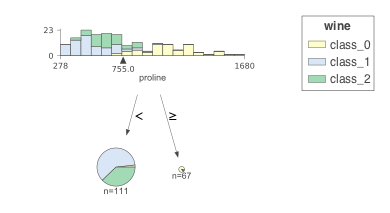

In [6]:
Image(viz.topng())

In [7]:
from IPython.core.display import HTML 

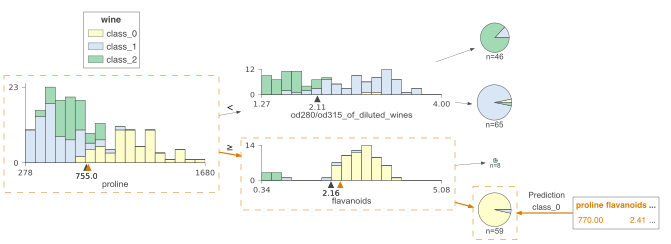

In [8]:
from IPython.core.display import SVG
display(SVG(filename="samples/wine-LR-2-X.svg"))

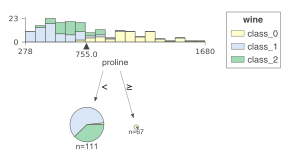

In [9]:
viz